#Lectura y procesamiento de los resultados de los mejores modelos LSTM

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de ESN. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsLSTM1S = pd.read_excel('grilla_LSTM_NARX_1STEPS.xlsx', header=0)
summaryModelsLSTM2S = pd.read_excel('grilla_LSTM_NARX_2STEPS.xlsx', header=0)
summaryModelsLSTM3S = pd.read_excel('grilla_LSTM_NARX_3STEPS.xlsx', header=0)
summaryModelsLSTM4S = pd.read_excel('grilla_LSTM_NARX_4STEPS.xlsx', header=0)

grilla_LSTM_NARX_AQP = pd.concat([summaryModelsLSTM1S, summaryModelsLSTM2S], ignore_index=True)
grilla_LSTM_NARX_AQP = pd.concat([grilla_LSTM_NARX_AQP, summaryModelsLSTM3S], ignore_index=True)
grilla_LSTM_NARX_AQP = pd.concat([grilla_LSTM_NARX_AQP, summaryModelsLSTM4S], ignore_index=True)

grilla_LSTM_NARX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    384 non-null    float64
 1   delayedSteps            384 non-null    int64  
 2   nameModel               384 non-null    object 
 3   nameHistory             384 non-null    object 
 4   nameConfiguration       384 non-null    object 
 5   timeTrain (in seconds)  384 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.1+ KB


##La cantidad de modelos generados para el LSTM NARX de DDFO fue de 384

In [4]:
rslt_df = grilla_LSTM_NARX_AQP.sort_values('MAPE')
total = grilla_LSTM_NARX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_LSTM_NARX_AQP.describe()

Tiempo total: 45765.38


MAPE  delayedSteps  timeTrain (in seconds)
count  384.000000    384.000000              384.000000
mean    79.460525      2.500000              119.180677
std     31.531037      1.119493               25.082178
min     14.241773      1.000000               47.580000
25%     53.141362      1.750000              102.467500
50%     99.629201      2.500000              108.090000
75%     99.644545      3.250000              126.002500
max    100.278004      4.000000              188.000000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 45765, lo que equivale a 12 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
349  14.241773  ...                  129.32
355  14.781036  ...                  124.84
361  15.409606  ...                  185.74
337  15.708667  ...                  125.74
379  16.807298  ...                  184.04
168  17.362845  ...                  143.26
144  17.381691  ...                  117.49
282  17.594273  ...                  164.73
157  17.715553  ...                  116.98
67   17.883707  ...                  103.63
342  18.135970  ...                  126.04
49   18.242058  ...                  103.28
319  18.611698  ...                  108.25
325  18.730019  ...                  109.44
169  18.851745  ...                  142.79
55   18.964110  ...                  103.80
61   19.080309  ...                  108.22
133  19.289023  ...                  104.76
354  19.388471  ...                  127.25
240  19.504415  ...                  122.49
175  19.713967  ...                  143.06
150  20.046808  ...                  113.71
162  20.552550  ...                  116.56
318  20.628720  ...                  109.25
324  20.831213  ...                  113.57
60   20.847158  ...                  109.17
91   21.294699  ...                  124.24
31   21.310031  ...                   98.24
37   21.423148  ...                  100.98
132  22.129043  ...                  104.01
127  22.208099  ...                  101.23
151  22.259623  ...                  116.29
54   22.363111  ...                  110.26
283  22.601542  ...                  165.10
228  22.762135  ...                  110.25
73   22.847049  ...                  125.24
174  22.969151  ...                  143.28
331  23.380996  ...                  108.24
156  23.414725  ...                  116.42
79   23.504100  ...                  126.97
229  23.561431  ...                  107.81
138  23.840509  ...                  103.49
217  23.851856  ...                  103.52
85   23.891461  ...                  125.99
222  23.987036  ...                  104.99

[45 rows x 6 columns]

In [6]:
rslt_df.iloc[5,:]

MAPE                                                                17.3628
delayedSteps                                                              2
nameModel                 results/LSTM_213_1_256_sigmoid_sigmoid_relu_me...
nameHistory               results/LSTM_213_1_256_sigmoid_sigmoid_relu_me...
nameConfiguration         results/LSTM_213_1_256_sigmoid_sigmoid_relu_me...
timeTrain (in seconds)                                               143.26
Name: 168, dtype: object

##Por principio de parsimonia, se decide trabajar con un modelo que genera un MAPE de 17.3, pero que tiene pocos retardos, especificamente 1 retardo.

In [7]:
bestModel = rslt_df.iloc[5,:]
print(bestModel)

MAPE                                                                17.3628
delayedSteps                                                              2
nameModel                 results/LSTM_213_1_256_sigmoid_sigmoid_relu_me...
nameHistory               results/LSTM_213_1_256_sigmoid_sigmoid_relu_me...
nameConfiguration         results/LSTM_213_1_256_sigmoid_sigmoid_relu_me...
timeTrain (in seconds)                                               143.26
Name: 168, dtype: object


In [8]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/LSTM_213_1_256_sigmoid_sigmoid_relu_mean_squared_error_2S_history.npy
results/LSTM_213_1_256_sigmoid_sigmoid_relu_mean_squared_error_2S_config.npy
results/LSTM_213_1_256_sigmoid_sigmoid_relu_mean_squared_error_2S.h5


In [9]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

LSTM_213_1_256_sigmoid_sigmoid_relu_mean_squared_error_2S_history.npy
LSTM_213_1_256_sigmoid_sigmoid_relu_mean_squared_error_2S_config.npy
LSTM_213_1_256_sigmoid_sigmoid_relu_mean_squared_error_2S.h5


In [10]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [99574.1953125, 99145.671875, 98733.46875, 98310.6640625, 97909.375, 97500.9765625, 97104.53125, 96723.3828125, 96348.5, 95984.203125, 95632.5390625, 95299.03125, 94979.9921875, 94664.6640625, 94374.953125, 94095.140625, 93817.6328125, 93566.4609375, 93314.90625, 93077.21875, 92845.9453125, 92620.5625, 92409.9453125, 92191.9921875, 91983.3984375, 91788.4296875, 91582.5234375, 91387.5703125, 91194.375, 91002.125, 90808.265625, 90621.8359375, 90431.140625, 90245.6171875, 90061.2734375, 89873.5234375, 89688.2421875, 89503.8515625, 89321.3515625, 89136.2734375, 88955.453125, 88767.546875, 88589.3828125, 88404.4296875, 88220.6953125, 88041.6640625, 87860.875, 87676.3828125, 87500.9453125, 87316.8515625, 87141.1484375, 86964.140625, 86785.3515625, 86610.5, 86440.8515625, 86263.484375, 86090.296875, 85919.96875, 85751.375, 85577.71875, 85406.03125, 85235.8828125, 85065.9921875, 84894.90625, 84722.0703125, 84556.828125, 84384.4765625, 84214.859375, 84043.84375, 83881.0, 83712.359375, 

In [11]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/trainDF_std.csv', header=0)
  testDFScaled = pd.read_csv('data/testDF_std.csv', header=0)
  trainDF = pd.read_csv('data/trainDF.csv', header=0)
  testDF = pd.read_csv('data/testDF.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


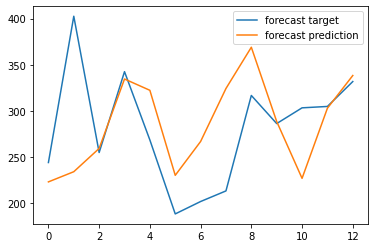

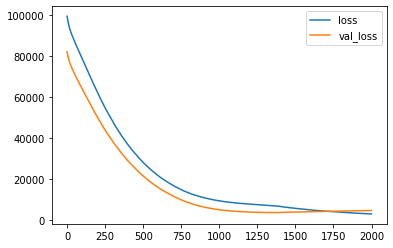

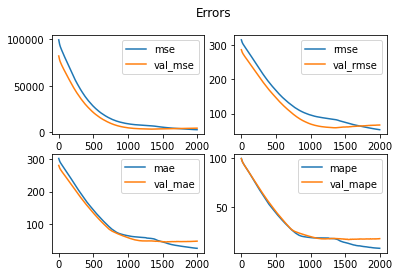

In [12]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)

##Generar data para NARMAX

In [13]:
def generateNarmaxData(dataScaled, data, delays, predictionHorizon, saved_model, columnTarget = 12):
  #Se hace una copia de los datos de entrada y agrega una columna con NA para los errores
  dataNarmax = data.copy()
  dataNarmax["error"] = np.nan
  dataNarmaxScaled = dataScaled.copy()
  dataNarmaxScaled["error"] = np.nan

  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      xAux = xAux.reshape(1,xAux.shape[0],xAux.shape[1])
      prediction = float(saved_model.predict(xAux))
      error = mape(salidaAux, prediction)
      dataNarmax.iloc[indexTarget, columnTarget+1] = error
      dataNarmaxScaled.iloc[indexTarget, columnTarget+1] = error
    indexAux = indexAux + 1
  dataNarmax = dataNarmax.dropna()
  dataNarmaxScaled = dataNarmaxScaled.dropna()
  return dataNarmax, dataNarmaxScaled

In [14]:
dataTrainNarmax, dataTrainNarmaxScaled = generateNarmaxData(trainDFScaled, trainDF, bestModel['delayedSteps'], 1, saved_model)
dataTestNarmax, dataTestNarmaxScaled = generateNarmaxData(testDFScaled, testDF, bestModel['delayedSteps'], 1, saved_model)

In [15]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()

dataTrainNarmaxScaled[['error']] = std_scaler.fit_transform(dataTrainNarmaxScaled[['error']])
dataTestNarmaxScaled[['error']] = std_scaler.fit_transform(dataTestNarmaxScaled[['error']])

In [16]:
dataTrainNarmax.to_csv('dataTrainNarmaxLSTM.csv', index = False)
dataTrainNarmaxScaled.to_csv('dataTrainNarmaxScaledLSTM.csv', index = False)
dataTestNarmax.to_csv('dataTestNarmaxLSTM.csv', index = False)
dataTestNarmaxScaled.to_csv('dataTestNarmaxScaledLSTM.csv', index = False)

In [17]:
dataTrainNarmax.iloc[:10,[0,1,12,13]]

Week_of_the_month  Day_of_the_week  Target_(Total_orders)       error
2                 1.0              6.0                129.412  125.878987
3                 2.0              2.0                317.120    5.580825
4                 2.0              3.0                210.517   43.885893
5                 2.0              4.0                207.364   45.996156
6                 2.0              5.0                263.043   12.984626
7                 2.0              6.0                248.958   24.944242
8                 3.0              2.0                344.291   11.445902
9                 3.0              3.0                248.428   17.690244
10                3.0              4.0                281.420    2.744559
11                3.0              5.0                243.568   18.820039

In [18]:
dataTrainNarmaxScaled.iloc[:10,[0,1,12,13]]

Week_of_the_month  Day_of_the_week  Target_(Total_orders)     error
2           -1.586212         1.414823              -1.929736  5.146091
3           -0.799661        -1.462783               0.182851 -0.801229
4           -0.799661        -0.743382              -1.016928  1.092503
5           -0.799661        -0.023980              -1.052414  1.196830
6           -0.799661         0.695422              -0.425767 -0.435199
7           -0.799661         1.414823              -0.584288  0.156062
8           -0.013109        -1.462783               0.488651 -0.511271
9           -0.013109        -0.743382              -0.590253 -0.202562
10          -0.013109        -0.023980              -0.218940 -0.941449
11          -0.013109         0.695422              -0.644951 -0.146707